<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Metropolis_Hastings_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metropolis Hastings 2D

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

In [72]:
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')

##Distribución T de Student Bivariada.
$$ f(\mathbf{X}) = \frac{\Gamma\left(\frac{\nu + 2}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \nu \pi |\mathbf{\Sigma}|^{1/2}} \left(1 + \frac{1}{\nu} (\mathbf{X} - \boldsymbol{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{X} - \boldsymbol{\mu}) \right)^{-\frac{\nu + 2}{2}} $$

In [73]:
from scipy.stats import multivariate_t #importamos la distribucion multivariada T
loc = np.array([1.0, -0.5]) #media
shape = np.array([[2.1, 0.3], [0.3, 1.5]]) #matriz de escala
df = 2 #grados de libertad

Text(0.5, 0, '$\\pi(x,y)$')

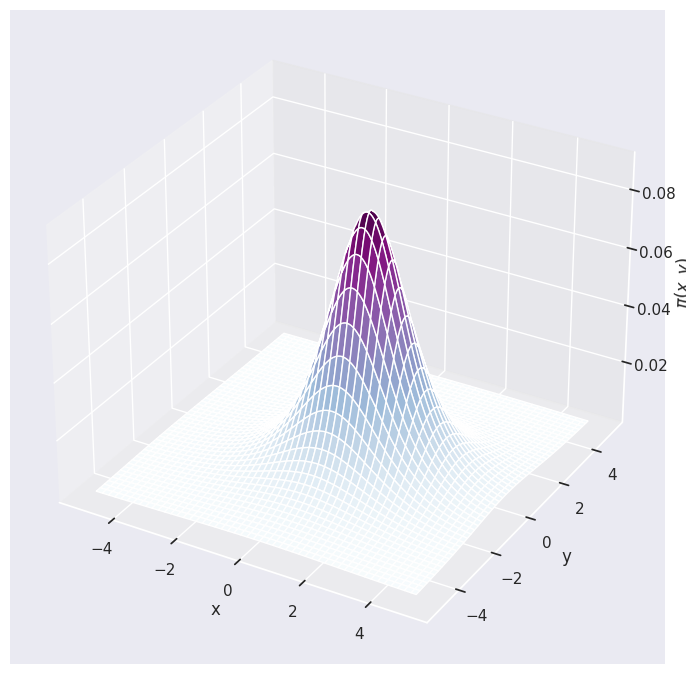

In [74]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate T
rv = multivariate_t(loc, shape, df) # distribución T multivariada.
pos = np.dstack((X, Y)) # generamos pares x,y
Z = rv.pdf(pos) # Calculamos la función de densidad de probabilidad

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

In [75]:
def T(x,y, loc, shape,df):
    rv = multivariate_t(loc, shape, df)
    # Calculamos la función de densidad de probabilidad
    return rv.pdf([x,y])

In [76]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star, loc, shape, df) / p(x, y, loc, shape, df):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


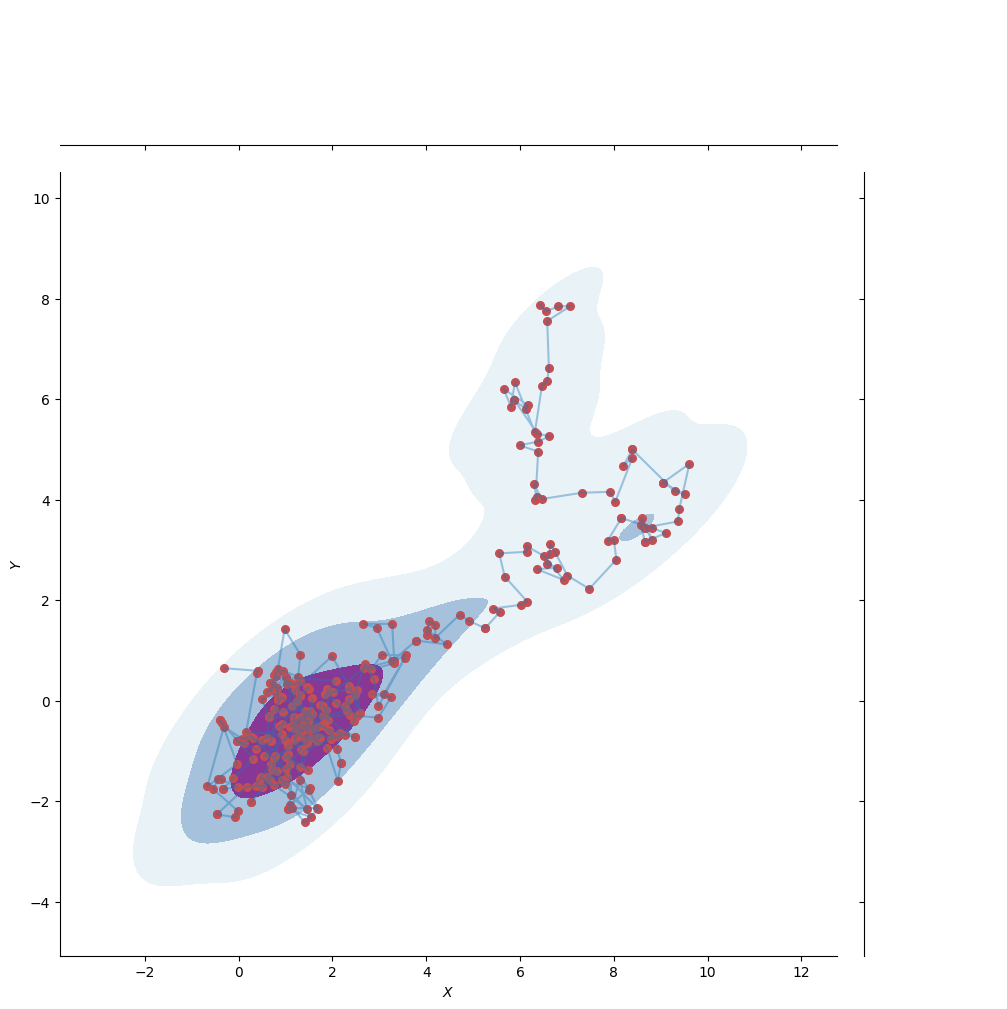

In [77]:
# generamos samples
samples = metropolis_hastings(T, 300, 0, 0, 0.4)

# visualizacion
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')

##Distribucion Beta Bivariada
$$ f(x, y; \alpha_1, \beta_1, \alpha_2, \beta_2, \rho) = \frac{1}{B(\alpha_1, \beta_1) B(\alpha_2, \beta_2) (1 - \rho^2)^{1/2}} \cdot \left( x^{\alpha_1 - 1} (1 - x)^{\beta_1 - 1} \right) \cdot \left( y^{\alpha_2 - 1} (1 - y)^{\beta_2 - 1} \right) \cdot \left( 1 - \rho^2 - \frac{(x - \mu_1)^2}{\sigma_1^2} - \frac{(y - \mu_2)^2}{\sigma_2^2} \right)^{\frac{\alpha_1 + \alpha_2 - 2}{2}} $$

In [78]:
from scipy.stats import beta

In [79]:
def beta_bivariada(x, y, alpha1, beta1, alpha2, beta2):
    #producto de las distribuciones beta unidimensionales
    return beta.pdf(x, alpha1, beta1) * beta.pdf(y, alpha2, beta2)

# Parámetros de la distribución beta
alpha1, beta1 = 2, 5  # Parámetros para la primera beta
alpha2, beta2 = 3, 4  # Parámetros para la segunda beta

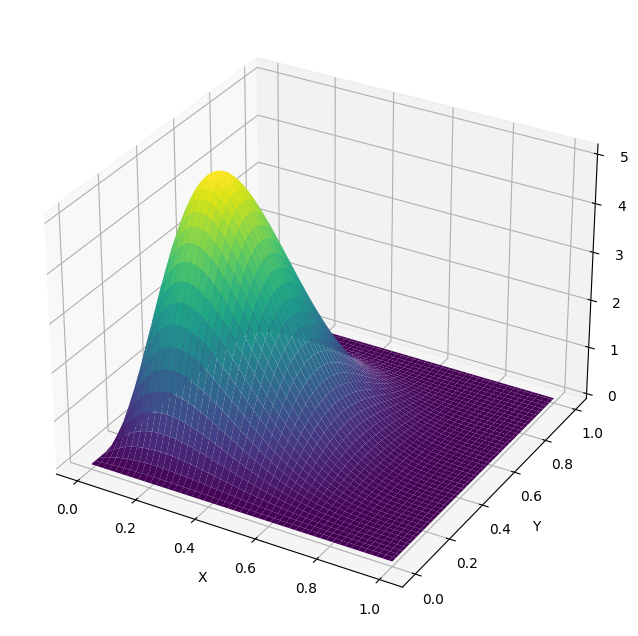

In [80]:
# Crear una cuadrícula de puntos (X, Y)
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Calcular la densidad para cada punto en la cuadrícula
Z = beta_bivariada(X, Y, alpha1, beta1, alpha2, beta2)

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densidad')

# Mostrar la gráfica
plt.show()

In [81]:
def metropolis_hastings(p, n, x0, y0, step, alpha1, beta1, alpha2, beta2):
    x = x0
    y = y0
    points = np.zeros((n, 2))  # Lista inicial de muestras

    for i in range(n):
        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de Metropolis-Hastings
        if 0 < x_star < 1 and 0 < y_star < 1:  # Asegurar que los valores están en (0, 1)
            if np.random.rand() < p(x_star, y_star, alpha1, beta1, alpha2, beta2) / p(x, y, alpha1, beta1, alpha2, beta2):
                x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


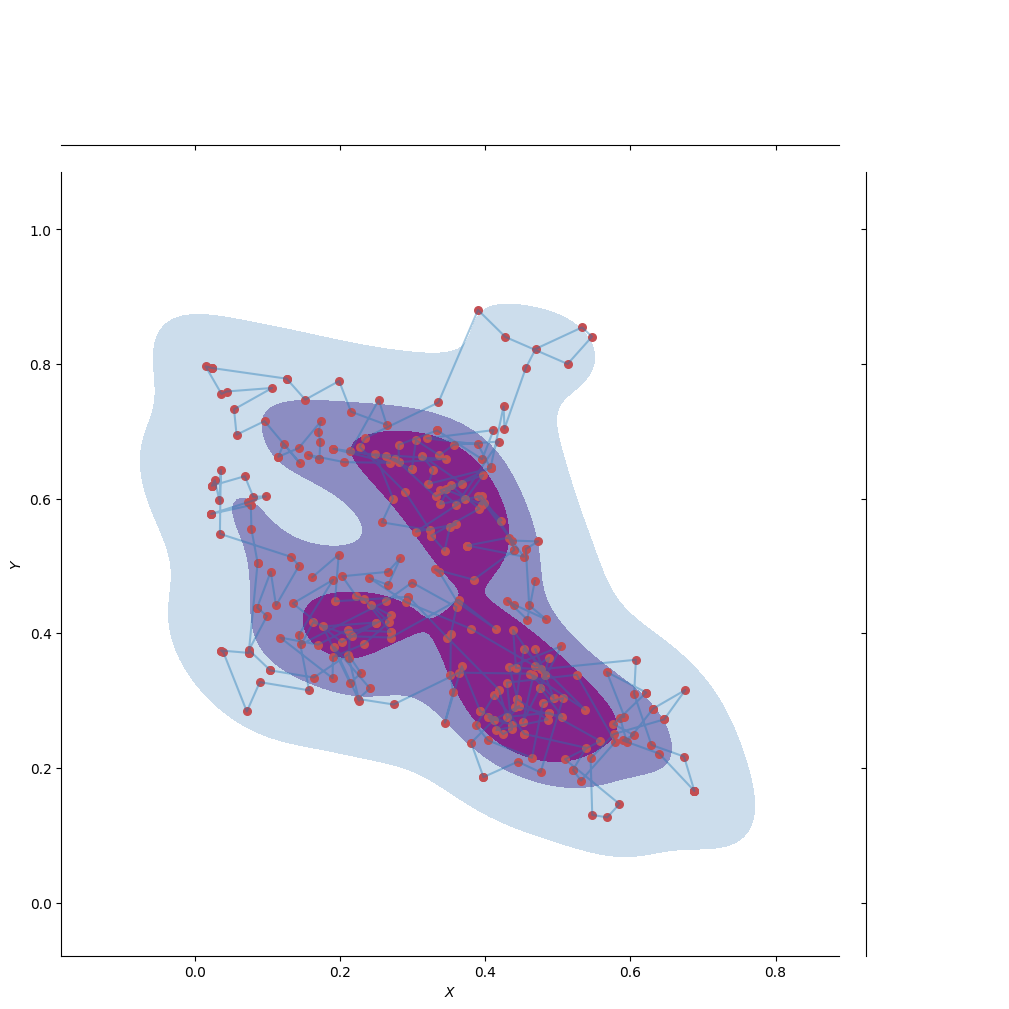

In [82]:
# generamos samples
samples = metropolis_hastings(beta_bivariada, 300, 0.5, 0.5, 0.05, alpha1, beta1, alpha2, beta2)

# visualizacion
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')

##Distribucion Gamma Bivariada:
$$ f(x, y; \alpha_1, \beta_1, \alpha_2, \beta_2) = \frac{\beta_1^{\alpha_1} \beta_2^{\alpha_2}}{\Gamma(\alpha_1) \Gamma(\alpha_2)} x^{\alpha_1 - 1} y^{\alpha_2 - 1} e^{-\left( \frac{x}{\beta_1} + \frac{y}{\beta_2} \right)}, \quad x, y > 0 $$

In [83]:
from scipy.stats import gamma

In [84]:
def Gamma(x, y, alpha1, beta1, alpha2, beta2):
    # Densidad de probabilidad de la distribución Gamma
    Z1 = gamma.pdf(x, a=alpha1, scale=1/beta1)
    Z2 = gamma.pdf(y, a=alpha2, scale=1/beta2)
    rv = Z1 * Z2  # Producto de las densidades para bivariadas
    return rv

In [85]:
alpha1, beta1 = 2, 1  #parámetros para la primera variable Gamma
alpha2, beta2 = 3, 1   #parámetros para la segunda variable Gamma

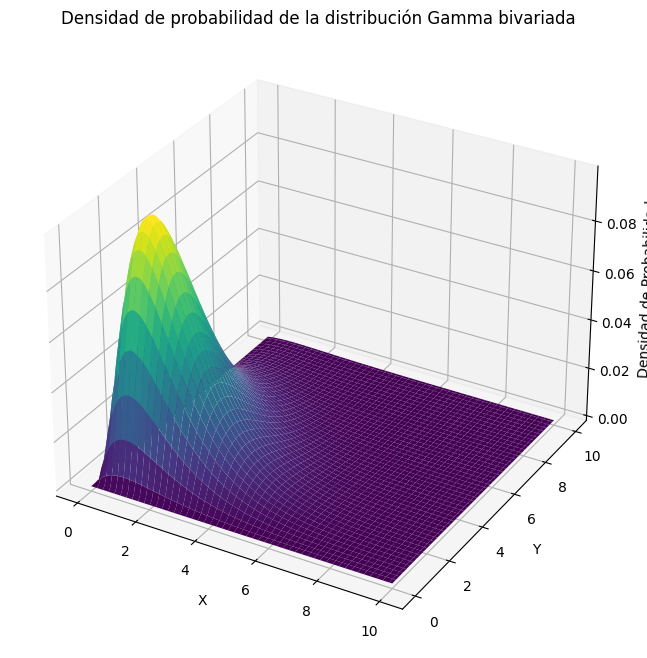

In [86]:
x_values = np.linspace(0, 10, 100)
y_values = np.linspace(0, 10, 100)

# Creación de una malla de puntos
X, Y = np.meshgrid(x_values, y_values)
Z = Gamma(X, Y, alpha1, beta1, alpha2, beta2)

# Visualización en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Densidad de probabilidad de la distribución Gamma bivariada')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Densidad de Probabilidad')
plt.show()


In [87]:
#Función de Metropolis-Hastings
def metropolis_hastings(p, n, x0, y0, step, alpha1, beta1, alpha2, beta2):
    x = x0
    y = y0
    points = np.zeros((n, 2))  # Lista inicial de muestras

    for i in range(n):
        # Proponemos nuevos valores para el estado actual
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step, size=2)

        # Condición de Metropolis-Hastings
        if p(x_star, y_star, alpha1, beta1, alpha2, beta2) > 0 and \
           np.random.rand() < p(x_star, y_star, alpha1, beta1, alpha2, beta2) / p(x, y, alpha1, beta1, alpha2, beta2):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

<ipython-input-87-2abb9066da63>:13: RuntimeWarning: divide by zero encountered in scalar divide
  np.random.rand() < p(x_star, y_star, alpha1, beta1, alpha2, beta2) / p(x, y, alpha1, beta1, alpha2, beta2):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


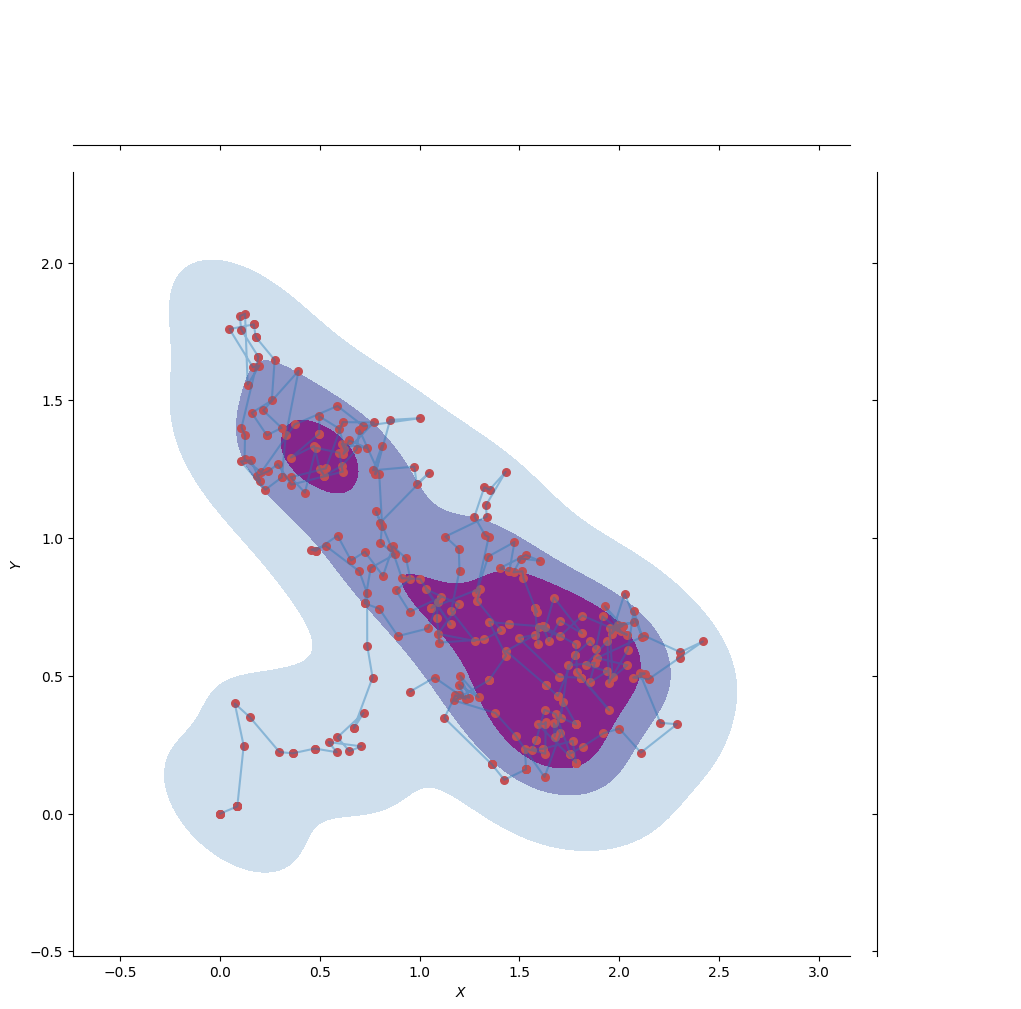

In [88]:
# generamos samples
samples = metropolis_hastings(Gamma, 300, 0, 0, 0.1, alpha1, beta1, alpha2, beta2)

# visualizacion
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')